Verifying accuracy of frontend against CCL

In [1]:
from halomodelpy import hm_calcs
import matplotlib.pyplot as plt
import pyccl as ccl
%matplotlib inline
import numpy as np
from halomodelpy import ccl_tools, redshift_helper

In [2]:
# generate redshift distribution
dndz = redshift_helper.dndz_from_z_list(np.random.normal(1.5, 0.001, 10000), 8)
# set up CCL object
cclob = ccl_tools.HOD_model(dndz[0])
# set up HaloModelPy object
hmob = hm_calcs.halomodel(dndz)
# ell values to compute angular power at 
ell = np.logspace(0, 4, 10000)

In [3]:
# a CCL unbiased matter "tracer"
clu1 = ccl.NumberCountsTracer(cclob.cosmo, has_rsd=False, dndz=dndz, bias=(dndz[0], np.ones_like(dndz[0])))
# CCL CMB lensing tracer
cmbl = ccl.CMBLensingTracer(cclob.cosmo, z_source=1090.)
# get power
cls_cmb_cross_lens1 = ccl.angular_cl(cclob.cosmo, clu1, cmbl, ell)

Text(0, 0.5, '$C_{\\ell}^{\\kappa g}$')

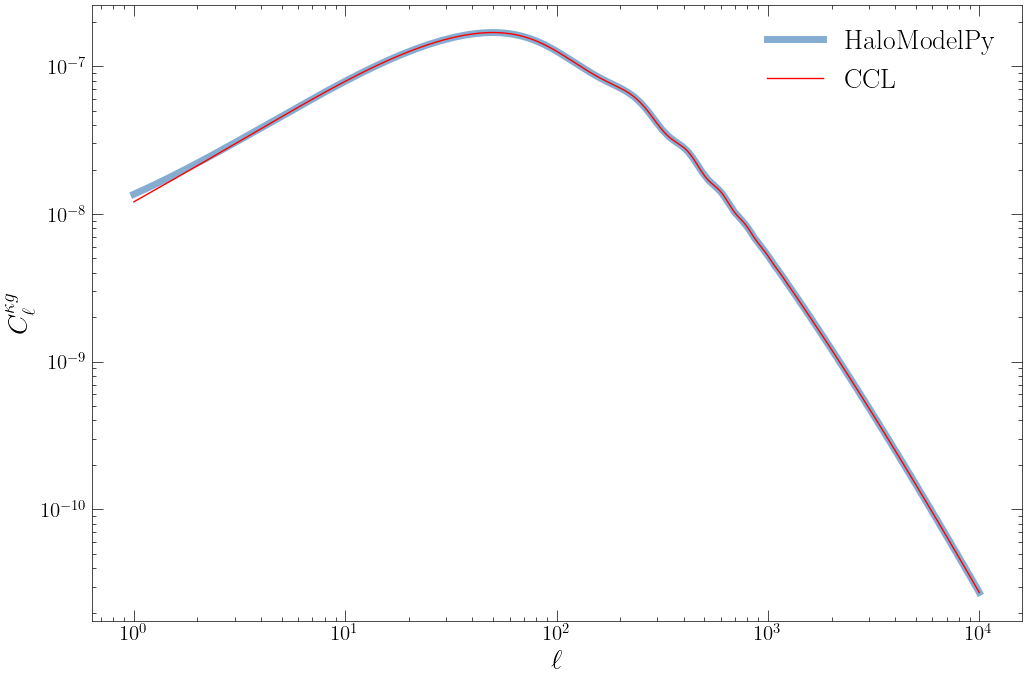

In [4]:
plt.figure(figsize=(12,8))
# get power in halomodelpy
plt.loglog(ell, hmob.get_c_ell_kg(ell), linewidth=5, alpha=0.5, label='HaloModelPy')
plt.loglog(ell, cls_cmb_cross_lens1, c='r', label='CCL')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\kappa g}$')


Text(0, 0.5, '$w(\\theta)$')

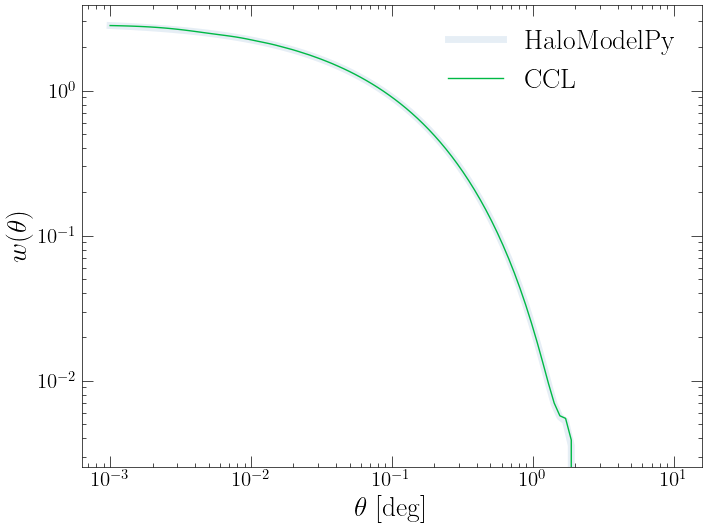

In [5]:
theta = np.logspace(-3, 1, 100)
plt.loglog(theta, hmob.get_ang_cf(theta), linewidth=5, alpha=0.1, label='HaloModelPy')
plt.loglog(theta, ccl.correlation(cclob.cosmo, ell=ell, C_ell=ccl.angular_cl(cclob.cosmo, clu1, clu1, ell), theta=theta), label='CCL')
plt.legend()
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$w(\theta)$')

Timing halomodelpy angular correlation prediction, 100 runs

In [6]:
import time
t0 = time.time()
for j in range(100):
    hmob.get_ang_cf(theta)
print(time.time()-t0)

0.0486140251159668


Timing CCL angular correlation prediction, 100 runs

In [7]:
t0 = time.time()
for j in range(100):
    ccl.correlation(cclob.cosmo, ell=ell, C_ell=ccl.angular_cl(cclob.cosmo, clu1, clu1, ell), theta=theta)
print(time.time()-t0)


6.713372468948364


Much faster to go directly from matter power to angular correlation
than to go first to Cl then w as CCL requires